In [1]:
import csv
import time
import string
import numpy as np
import pandas as pd
import timeit
from Constants import *
from Dataset import *
from DataRequests import *
from WordRepLibrary import *
from Graphing import *


Complete.


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alfew\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
a = [[1,2,3], 4, 5]
for b in a:
    if isinstance(b, list):
        b[-1] = 777
a

[[1, 2, 777], 4, 5]

In [3]:
func2(50000000)

Filename: C:\Users\alfew\Code\LanguArt\Constants.py

Line #    Mem usage    Increment  Occurences   Line Contents
    10 158.8047 MiB 158.8047 MiB           1   @profile(precision=4)
    11                                         def func2(n):
    12 159.6250 MiB   0.8203 MiB           1      return sum(list(range(n)))




1249999975000000

In [141]:
#  Nossa data coding test
# 1) Given an array of integers where all but one are unique, find the duplicate number
def generate_input(n_max=50, x_max=5000):
    arr = np.random.choice(np.random.randint(n_max, x_max), np.random.randint(1, n_max + 1), replace=False)
    arr = np.insert(arr, np.random.randint(0, len(arr)), arr[np.random.randint(0, len(arr))])
    return arr
inputs = [generate_input() for _ in range(1000)]
int_arr = inputs[0]
int_arr.sort()

In [143]:
#  Nieve approach
def nieve_get_dup(int_arr):
    return [x for x in int_arr if sum(x == int_arr) > 1][0]
nieve_get_dup(int_arr)

2860

In [230]:
def get_duplicate_runhash(X):
    """Get the duplicate number from an (unsorted) list.
    
    Time complexity = O(n)
    Space complexity = O(n)
    
    where n is the length of the list.
    
    Argument: An iterable of integers X
    Returns: The integer in the list which occurs twice
    """
    arr_set = set()
    for n in X:
        if n in arr_set: return n
        arr_set.add(n)
get_duplicate_runhash(X)

2860

In [152]:
def get_duplicate_presorted(sorted_arr):  # time complexity = O(log n), space complexity = O(1)aginary part (default 0.0)
    prev_n = sorted_arr[0]
    for n in sorted_arr[1:]:
        if n == prev_n: return n
        prev_n = n
get_duplicate_presorted(int_arr)

2860

In [153]:
def get_duplicate_sorted(int_arr):  # time complexity = O(n log n), space complexity = O(1) (in place sorting)
    sorted_arr = np.sort(int_arr)
    prev_n = sorted_arr[0]
    for n in sorted_arr[1:]:
        if n == prev_n: return n
        prev_n = n
get_duplicate_sorted(int_arr)

2860

In [145]:
# def get_duplicate_bitwise(int_arr):  # Sequentially eliminate candidates based on bit pattern grouping
#     return get_duplicate_bitwise_(int_arr)
def get_duplicate_bitwise(int_arr, bits=[], shift_n=31):  # time complexity = O(n), space complexity = O(n)
    if shift_n == -1: return np.nan
    new_bits = (((int_arr << shift_n)) < 0)
    new_bits = np.expand_dims(new_bits, 1)
    bits = np.hstack([bits, new_bits]) if len(bits) > 0 else new_bits
    occs = {}
    for i, pattern in enumerate(bits):
        pattern = tuple(pattern)
        occs[pattern] = (occs[pattern] + [i]) if pattern in occs else [i]
    to_rem = []
#     for pattern in list(occs.keys()):
    for pattern in occs:
        if len(occs[pattern]) == 1:
            to_rem += occs[pattern]
#             del occs[pattern]
    int_arr = np.delete(int_arr, to_rem)
    bits = np.delete(bits, to_rem, axis=0)
    if len(int_arr) == 2:
        return int_arr[0]
#     for pattern in occs:
#         if len(occs[pattern]) == 2:
#             branch_result = get_duplicate_bitwise(int_arr[occs[pattern]], bits[occs[pattern]], shift_n - 1)
#             if branch_result != np.nan: return branch_result
    return get_duplicate_bitwise_(int_arr, bits, shift_n - 1)
get_duplicate_bitwise(int_arr)

2860

In [146]:
%timeit [nieve_get_dup(lst) for lst in inputs]

1.55 s ± 43.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [147]:
%timeit [get_duplicate_runhash(lst) for lst in inputs]

3.77 ms ± 312 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [148]:
inputs_sorted = [np.sort(x) for x in inputs]
%timeit [get_duplicate_presorted(lst) for lst in inputs_sorted]

1.7 ms ± 65.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [151]:
%timeit [get_duplicate_sorted(lst) for lst in inputs]

4.35 ms ± 282 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [149]:
%timeit [get_duplicate_bitwise(lst) for lst in inputs]

651 ms ± 20.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [215]:
# 2) Given a number N, find the length of the longest consecutive sequence of 1s in its binary representation.
inputs_2 = np.random.randint((-2**31) + 1, (2**31) - 1, 100)

In [74]:
def longest_1seq(N):
    """Get the longest consecutive sequence of 1s in the binary representation of an integer.
    
    This assumes that negative integers have the first bit equal to 1
    
    Time complexity = O(log |N|)
    Space complexity = O(log |N|)
    
    where N is the integer input and log is the base-2 logarithm, assuming that the input integer representation varies with N.
    
    Argument: An integer N
    Returns: The length of the longest consecutive sequence of 1s in the binary representation of N
    """
    l, cur_l = 0, 0 if N >= 0 else 1
    for c in str(bin(N))[2 if N >= 0 else 3:]:
        if c == '1':
            cur_l += 1
            if cur_l > l: l = cur_l
        else:
            cur_l = 0
    return l
longest_1seq(np.array(2**31 - 1) + 2)

32

In [219]:
%timeit [longest_1seq(N) for N in inputs_2]

228 µs ± 10.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [216]:
y = [timeit.timeit(lambda: longest_1seq(x)) for x in inputs_2]

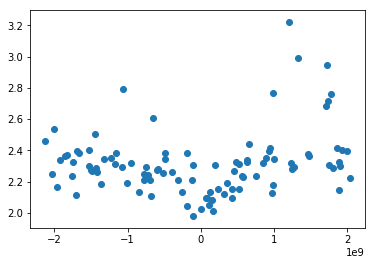

In [217]:
plt.scatter(inputs_2, y)

In [42]:
# 3) Given an arbitrarily nested list of integers, calculate the weighted sum of all elements in the
#    list. If a list is nested once, the nested sum has a weight of 2^1. If a list is nested twice, the
#    nested sum has a weight of 2^2, etc.
def gen_nestedlist():
    return [x if x >= 0 else gen_nestedlist() for x in np.random.randint(-3, 5, np.random.randint(1, 5))]
inputs_3 = [gen_nestedlist() for _ in range(1000)]

In [75]:
def weighted_sum(X):
    """Calculate the weighted sum of an arbitrarily nested list of integers, where the nested elements have a weight of 2^depth
    
    Time complexity = O(n + m)
    Space complexity = O(1)
    
    where n is the number of integers in the input, m is the number of internal nestings.
    
    Argument: An arbitrarily nested list of integers X
    Returns: The weighted sum of X
    """
    return sum(weighted_sum_(x) for x in X)
def weighted_sum_(X):
    if isinstance(X, list): return 2 * sum(weighted_sum_(x) for x in X)
    return X
weighted_sum([1, 2, [1, [3, 3, [4]], 1]])

63

In [61]:
%timeit [weighted_sum(x) for x in inputs_3]

c:\python36\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in long_scalars
  after removing the cwd from sys.path.


23.7 ms ± 918 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [67]:
def count_elems(X):
    if isinstance(X, list): return sum([count_elems(x) for x in X])
    return 1
def count_nests(X):
    if isinstance(X, list): return sum([count_nests(x) for x in X]) + 1
    return 0
x = [count_elems(x_) for x_ in inputs_3]
x2 = [count_nests(x_) for x_ in inputs_3]

In [68]:
y = [timeit.timeit(lambda: weighted_sum(X), number=100) for X in inputs_3]

c:\python36\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in long_scalars
  after removing the cwd from sys.path.


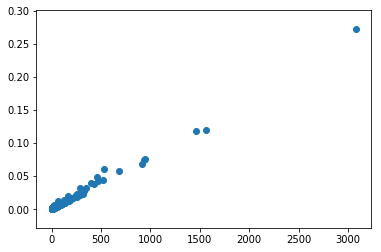

In [72]:
plt.scatter(x, y)

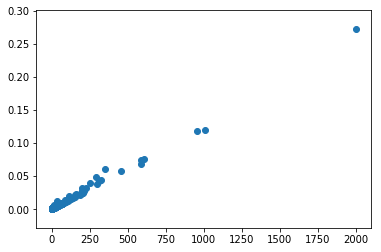

In [73]:
plt.scatter(x2, y)

In [89]:
a = range(5)
sum(a)

10

In [92]:
func(5)

ERROR: Could not find file <ipython-input-91-5a063de58310>
NOTE: %mprun can only be used on functions defined in physical files, and not in the IPython environment.


10

In [88]:
a = [[1,2,3],[3,4], [5,4]]
b = [sum(thingy(a__) for a__ in a_) for a_ in a]
a, b

([[-1, 2, 3], [-1, 4], [-1, 4]], [6, 7, 9])

In [ ]:
def thingy(x):
    global a
    a *= 10
    return x

In [87]:
def sum_edit(l):
    sum_ = sum(l)
    l[0] = -1
    return sum_

In [87]:
dataset = Wordset(data_csv, labels_de)
df = dataset.load()

In [129]:
"mickey-mouse" in library.library.index

True

In [108]:
df.loc[:, "nbc"] = np.vectorize(lambda x: str(x)[:5])(df.loc[:, "nbc"])

In [3]:
dataset.save()

In [60]:
ngrams_db = load_ngram_counts()


Loading ngram counts database... 1008958 entries
Loading ngram counts database took 1.8695237636566162 seconds.


In [61]:
from WordValidation import *
library.import_autocorrect_1grams(ngrams_db)

Importing 1gram capitalisation autocorrection index...
Completed 1grams import.


In [62]:
"hellfire" in ngrams_db.index

False

In [85]:
library.autocorrect_word("briar")

'Briar'

In [6]:
fruits = ["Gaussian process", "decision tree", "neural network", "perceptron", "random forest", "linear regression", "mixture model", "Gaussian mixture model", "matrix factorization", "Restricted Boltzmann Machine", "deep learning", "Support Vector Machine", "Long Short-Term Memory", "convolutional neural network", "recurrent neural network", "transformer", "attention", "multi-head attention", "residual connections", "dropout", "batch normalisation", "GAN", "generative adversarial network", "LDA", "latent Dirichlet allocation", "HMM", "hidden Markov model", "GPT", "GloVe", "word2vec", "BERT", "ELMo", "DeepDream", "variational autoencoder", "logistic regression", "fastText", "k nearest neighbours", "k means", "AdaBoost", "belief network", "graphical model", "genetic algorithm", "autoencoder", "inception", "monte carlo", "gradient descent", "spiking neural network", "image segmentation", "U-Net", "ReLU", "softmax", "Expectation–maximization", "density estimation", "inverse entailment", "inductive logic programming", "computer vision", "reinforcement learning", "recommender system", "optical character recognition", "facial recognition", "emotion recognition", "upsampling", "super resolution", "inverse reinforcement learning", "temporal difference learning", "optimal control"]

In [16]:
np.random.shuffle(fruits)
print(len(fruits))
"A list of ML algorithms: " + ', '.join(fruits) + ', '

66


'A list of ML algorithms: Gaussian mixture model, logistic regression, ReLU, LDA, emotion recognition, image segmentation, gradient descent, DeepDream, AdaBoost, generative adversarial network, GloVe, convolutional neural network, decision tree, transformer, neural network, GPT, U-Net, facial recognition, Long Short-Term Memory, recurrent neural network, inverse entailment, Expectation–maximization, optimal control, word2vec, density estimation, linear regression, latent Dirichlet allocation, k nearest neighbours, matrix factorization, genetic algorithm, batch normalisation, GAN, BERT, inductive logic programming, perceptron, belief network, optical character recognition, monte carlo, computer vision, inverse reinforcement learning, k means, Gaussian process, fastText, deep learning, super resolution, dropout, HMM, Restricted Boltzmann Machine, softmax, attention, autoencoder, multi-head attention, upsampling, recommender system, inception, ELMo, variational autoencoder, residual conne

In [4]:
fruits=["apple","orange","grapefruit","peach","lemon","lime","pineapple","kiwi","mango","papaya","watermelon",
        "strawberry","pomegranate","melon","plum","pear","pumpkin","apricot","cherry"]
np.random.shuffle(fruits)
print(len(fruits))
"List of round fruits: " + ', '.join(fruits) + ', '

19


'List of round fruits: strawberry, lemon, cherry, grapefruit, kiwi, pomegranate, pumpkin, peach, orange, apricot, plum, watermelon, mango, papaya, pear, pineapple, melon, lime, apple, '

In [24]:
fruits=["fox", "dolphin", "elephant", "dog", "wolf", "monkey", "lizard", "rabbit", "rat", "monkey", "cat",
        "bird", "frog", "horse", "fish", "whale", "shark", "turtle", "spider", "bat",  "butterfly", "moth", "beetle", 
        "worm", "snake", "fly"]
np.random.shuffle(fruits)
print(len(fruits))
"Long list of well-known wild animals: " + ', '.join(fruits) + ', '

26


'Long list of well-known wild animals: lizard, beetle, dolphin, whale, wolf, shark, fox, rat, moth, spider, rabbit, monkey, butterfly, bird, snake, fly, bat, monkey, turtle, frog, elephant, horse, dog, fish, worm, cat, '

In [116]:
ngrams_db_precomp = pd.read_csv(ngrams_csv_precomp, index_col="root",
    keep_default_na=False, usecols=["root", "word", "type", "total"], dtype={
    **{k: str for k in ["word", "root", "type"]},
    **{k: float for k in ["total", "total_b", "last5", "last10", "last20"]},
    **{k: float for k in ["mean", "mode", "min", "max"]}})
ngrams_db_precomp = ngrams_db_precomp.sort_index()

In [19]:
ngrams_db_precomp_old = pd.read_csv(data_dir + "data_old/ngram_counts_precomp_.csv", index_col="root",
    keep_default_na=False, usecols=["root", "word", "type", "total"], dtype={
    **{k: str for k in ["word", "root", "type"]},
    **{k: float for k in ["total", "total_b", "last5", "last10", "last20"]},
    **{k: float for k in ["mean", "mode", "min", "max"]}})
ngrams_db_precomp_old = ngrams_db_precomp_old.sort_index()

In [20]:
len(ngrams_db_precomp.index), len(ngrams_db_precomp_old.index)

(8540971, 8425576)

In [21]:
len(ngrams_db_precomp.index.unique()), len(ngrams_db_precomp_old.index.unique())

(1008958, 981611)

In [6]:
ngrams_db_precomp[ngrams_db_precomp["word"] == "lucre"]

,word,type,total
root,,,
lucre,lucre,ADP,603.0
lucre,lucre,ADV,1049.0
lucre,lucre,ADJ,314819.0
lucre,lucre,DET,136.0
lucre,lucre,?,395272.0
lucre,lucre,NOUN,65681.0
lucre,lucre,VERB,10208.0
lucre,lucre,X,2638.0
lucre,lucre,PRON,80.0


In [11]:
ngc_cols = ['type', 'ngc', 'nbc', 'mean', 'mean_mode', 'mode_mode',
            'min', 'max', 'last5', 'last10', 'last20']
ngrams_db = pd.read_csv(data_dir + "ngram_counts.csv", index_col="word", encoding='utf-8',
        keep_default_na=False, dtype={k: str for k in ngc_cols})

In [12]:
ngrams_db_old = pd.read_csv(data_dir + "data_old/ngram_counts_.csv", index_col="word", encoding='utf-8',
        keep_default_na=False, dtype={k: str for k in ngc_cols})

In [28]:
len([w for w in ngrams_db_old.index if w not in ngrams_db.index]), \
    len([w for w in ngrams_db.index if w not in ngrams_db_old.index])

(0, 27347)

In [29]:
"antipornography" in ngrams_db.index

True

In [30]:
len(ngrams_db_old.index), len(ngrams_db_old.index.unique())

(1120379, 981611)

In [31]:
len(ngrams_db.index), len(ngrams_db.index.unique())

(1008958, 1008958)

In [27]:
ngrams_db.index = map(word_root, list(ngrams_db.index))
ngrams_db.index.name = "word"
ngrams_db_old.index = map(word_root, list(ngrams_db_old.index))
ngrams_db_old.index.name = "word"

In [15]:
from WordValidation import *

Loading word representation library 'glove.840B.300d.txt'
Loading word representation library took 88.90577149391174 seconds.

Loading word representation library 'glove.twitter.27B.25d.txt'
Loading word representation library took 4.715948104858398 seconds.

Loading word representation library 'glove.6B.200d.txt'
Loading word representation library took 11.978671312332153 seconds.



In [16]:
valid_word("antipornography")

Case-insensitive vocabulary for representation library...
Completed
Case-insensitive vocabulary for representation library...
Completed


True

In [24]:
"antipornography" in ngrams_db.index

True

In [42]:
ngrams_db[n]

type             NOUN
ngc            487533
nbc            124827
mean         2003.733
mean_mode    2015.895
mode_mode        2016
min              1890
max              2019
last5           79045
last10         160536
last20         335345
Name: Bangladeshi, dtype: object

In [35]:
pattern.en.verbs['avert']

['avert',
 '',
 '',
 'averts',
 '',
 'averting',
 '',
 '',
 '',
 '',
 'averted',
 'averted',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']

In [40]:
pattern.en.verbs.tenses("averted")

[('past', None, 'plural', 'indicative', 'imperfective'),
 ('past', None, None, 'indicative', 'progressive'),
 ('past', None, None, 'indicative', 'imperfective'),
 ('past', 1, 'singular', 'indicative', 'imperfective'),
 ('past', 1, 'plural', 'indicative', 'imperfective'),
 ('past', 2, 'singular', 'indicative', 'imperfective'),
 ('past', 2, 'plural', 'indicative', 'imperfective'),
 ('past', 3, 'singular', 'indicative', 'imperfective'),
 ('past', 3, 'plural', 'indicative', 'imperfective')]

In [3]:
ngrams_db.loc["lucre"]

type              ADJ
ngc            471680
nbc            312649
mean         1917.992
mean_mode    1987.499
mode_mode        2008
min              1505
max              2019
last5           23055
last10          45116
last20          86750
Name: lucre, dtype: object

In [47]:
ngrams_db_precomp.loc["un-transmittable"]

KeyError: 'the label [un-transmittable] is not in the [index]'

In [49]:
from WordValidation import *

Loading word representation library 'glove.840B.300d.txt'
Loading word representation library took 88.23415899276733 seconds.

Loading word representation library 'glove.twitter.27B.25d.txt'
Loading word representation library took 4.622228384017944 seconds.



In [56]:
def valid_word(w, min_year=0):
    if len(w) < 1: return False
    if w[0] == '-' or w[-1] == '-': return False
    w_lower = w.lower()
    return ((min_year >= 2012) or library.get_exists_ci(w_lower) or \
        library3.get_exists_ci(w_lower) or \
        library2.get_exists_ci(w_lower) or (w_lower in allowed_words)) and \
        ((all([c in allowed_chars for c in w]) and w[0] in alphabet_chars) or \
        w_lower in allowed_words) and w not in disallowed_words

In [57]:
valid_word("untransmittable")

Case-insensitive vocabulary for representation library...
Completed


True

In [62]:
library.get_exists_ci("noncommunicable")

True

In [55]:
words_6B  = data_dir+word_rep_dir+"glove.6B/glove.6B.200d.txt"
library3 = WordRepLibrary(words_6B)      # From Wikipedia 2014 + Gigaword 5

Loading word representation library 'glove.6B.200d.txt'
Loading word representation library took 12.359163999557495 seconds.



In [101]:
ngrams_pretotals = ngrams_db_precomp#[["type", "total"]]
n_doing = len(ngrams_db.index)
i = 0
start_time = time.time()
new_words, new_types = [], []
for w in list(ngrams_db.index):
    i += 1
    w = w.lower().replace('-', '')
    x = ngrams_pretotals.loc[w]
    if isinstance(x, pd.Series):
        x = pd.DataFrame(x).T
        x.index.name = "root"
        
    x__ = []
    x_v = {}  # Word part of speech variants stored for top type extraction
    uniq_variants = list(x.word.unique())
    for w_ in uniq_variants:
        x_ = x[x.word == w_]
        x_v[w_] = x_
        x__.append(x_.iloc[np.argmax(x_["total"].values)])
    x = pd.DataFrame(x__)
    x_ = x[x.type == '?']
    if x_.shape[0] < 1: x_ = x
    arg_max = x_.iloc[np.argmax(x_["total"].values)]
    word = arg_max.word

    pos_filt = x_v[word].query("type == @pos_tags")
    pos_max = pos_filt.iloc[np.argmax(pos_filt["total"].values)].type \
        if pos_filt.shape[0] > 0 else '?'
    
    new_words.append(word)
    new_types.append(pos_max)
    
    if (i % 1000 == 0 or i == (n_doing - 1)) and i > 0:
        pc = round(100.0 * (float(i) / float(n_doing)), 2)
        fr = float(n_doing - i) / float(i)
        tr = (time.time() - start_time) * fr
        tr = (str(round(tr / 60, 2)) + ' minute' if tr > 120 \
              else str(round(tr, 2)) + ' second') + "s remaining)      "
        sys_print("\rFixed word ngram types: " + str(i) + " / " + \
            str(n_doing) + " (" + str(pc) + "%, " + tr)
ngrams_db.index = new_words
ngrams_db.index.name = "word"
ngrams_db.loc[:, "type"] = new_types

Fixed word ngram types: 1120378 / 1120379 (100.0%, 0.0 seconds remaining)         

In [106]:
ngrams_db.to_csv("data/ngram_counts.csv")

In [36]:
ngrams_db.loc["5221"]

type         NaN
ngc          NaN
nbc          NaN
mean         NaN
mean_mode    NaN
mode_mode    NaN
min          NaN
max          NaN
last5        NaN
last10       NaN
last20       NaN
Name: 5221, dtype: object

In [39]:
%timeit ngrams_db.loc["front", "type"] = "?"

385 ms ± 9.28 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
%timeit ngrams_db_precomp.loc["a001438"]

116 µs ± 1.96 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [25]:
list(ngrams_db_precomp.loc[["a001438"]].index.unique())

['a001438']

In [18]:
a = pd.DataFrame(ngrams_db_precomp.loc["a001438"]).T
a.index.name = "word"
a

,type,total
word,,
a001438,?,56


In [24]:
list(a.index.unique())

['a001438']

In [27]:
type(ngrams_db_precomp.loc["a001438"]), type(ngrams_db_precomp.loc["a00"])

(pandas.core.series.Series, pandas.core.frame.DataFrame)

In [31]:
isinstance(ngrams_db_precomp.loc["a001438"], pd.Series)

True

In [30]:
pd.Series == pd.core.series.Series

True

In [62]:
qmarks = ['???' + str(i) for i in range(len(ngrams_db))]

In [33]:
Out[19]

type                 ?
ngc          218510629
nbc           14518463
mean          1969.817
mean_mode     2013.696
mode_mode         2014
min               1472
max               2019
last5         23733049
last10        50738847
last20        84696606
Name: front, dtype: object

In [29]:
a = ngrams_db_precomp[ngrams_db_precomp["word"] == "front"][["type", "total"]].query("type == @pos_tags")
a.iloc[np.argmax(a["total"].values)].type

'NOUN'

In [27]:
ngrams_db_precomp.loc["front"], ngrams_db_precomp.loc["front"].iloc[np.argmax(ngrams_db_precomp.loc["front"].total.values)]

(        word      type        total     total_b      mean    mode     min  \
 root                                                                        
 front  front       ADJ         87.0        47.0  2008.149  2011.0  1929.0   
 front  front       ADJ        265.0       254.0  1928.015  1919.0  1821.0   
 front  Front      NOUN        131.0       122.0  1955.550  2011.0  1860.0   
 front  fRont      NOUN        115.0        90.0  2000.452  2014.0  1851.0   
 front  front      NOUN         74.0        65.0  1987.757  2006.0  1856.0   
 front  front  iterator        380.0        93.0  2005.411  1999.0  1995.0   
 front  FRONT      NOUN    1494728.0    508664.0  1963.749  1985.0  1500.0   
 front  front         ?  198987348.0  11041128.0  1969.553  2014.0  1475.0   
 front  FRONT         ?    1650539.0    544028.0  1964.323  1985.0  1500.0   
 front  FroNT       ADJ        140.0        43.0  1959.779  1944.0  1805.0   
 front  front     wheel        165.0        44.0  2009.594  2015

In [50]:
ngrams_db[["type", "total"]].groupby("type").sum().sum()

total    3119245190725
dtype: int64

In [48]:
ngrams_db[["type", "total"]].groupby("type").sum().sort_values("total")[-55:]

,total
type,
A,46441
not,46499
0,46500
time,47759
nd,48566
3,49227
HOME,49238
I,49533
value,50423


In [52]:
ngrams_db[["type", "total"]].groupby("type").sum().sort_values("total")[-15:] / 31192451907.25

,total
type,
A,0.000001
not,0.000001
0,0.000001
time,0.000002
nd,0.000002
3,0.000002
HOME,0.000002
I,0.000002
value,0.000002


In [75]:
sorted(['c', 'a', 'd'])

['a', 'c', 'd']

In [76]:
[w for w in ngrams_db.root.unique() if type(w) == float]

[nan]

In [68]:
pos_tags = [
    "X",       #   4562969893          (   0.15%   )
    "NUM",     # 10359909952           (   0.33%   )
    "PRT",     # 45361608405           (   1.45%   )
    "CONJ",    #    60763767404        (   1.95%   )
    "ADV",     # 71401527469           (   2.29%   )
    "PRON",    #    75534024221        (   2.42%   )
    "ADJ",     # 128073334803          (   4.11%   )
    "DET",     # 184719428708          (   5.92%   )
    "ADP",     # 216548456584          (   6.94%   )
    "VERB",    #    249754507701       (   8.00%   )
    "NOUN",    #   1559809008954       (   16.42%  )
]

In [72]:
ngrams_db[["type", "total"]].groupby("type").sum().sort_values("total")[-15:].query("type == @pos_tags").shape[0]

0

In [58]:
ngrams_db.query("type == @pos_tags")

UndefinedVariableError: local variable 'pos_tag' is not defined

In [252]:
library = pd.read_table(data_dir + word_rep_dir + "glove.840B/glove.840B.300d.txt", header=None, sep=' ',
                encoding="utf8", index_col=0, quoting=csv.QUOTE_NONE)

In [253]:
library.shape

(2196017, 300)

In [233]:
library.shape[0]

1193514

In [246]:
for x in library.index.dropna().values:
#     print(type(x))
    if type(x) != str:
        print(x, type(x))

In [254]:
print(library.shape[0])
library = library.loc[library.index.dropna()]
print(library.shape)

2196017
(2196011, 300)


In [1]:
library.iloc[0]

NameError: name 'library' is not defined

In [242]:
library.loc[float('nan')]

KeyError: nan

In [240]:
np.nan

nan

In [236]:
library.loc[np.nan].delete()

KeyError: nan

In [123]:
100 * ngrams_db.root.unique().shape[0] / ngrams_db.shape[0], ngrams_db.shape[0]

(8.841758803619257, 4338017)

In [176]:
ngrams_db.iloc[234], ngrams_db.loc[ngrams_db.index[234]],

(root         chofu
 total         1093
 total_b        625
 mean       1976.07
 mode          1994
 min           1885
 max           2019
 last5            6
 last10          29
 last20         156
 Name: CHOFU, dtype: object,
         root  total  total_b      mean    mode   min   max  last5  last10  \
 word                                                                        
 CHOFU  chofu   1093      625  1976.067  1994.0  1885  2019      6      29   
 CHOFU  chofu   1092      624  1976.137  1994.0  1885  2019      6      29   
 
        last20  
 word           
 CHOFU     156  
 CHOFU     156  )

In [166]:
a = pd.DataFrame([ngrams_db.iloc[234], ngrams_db.iloc[2343]])
a.total * a["mean"]

CHOFU     2159841.231
BuCHAN     337951.941
dtype: float64

In [172]:
list(ngrams_db.iloc[234])

['chofu', 1093, 625, 1976.067, 1994.0, 1885, 2019, 6, 29, 156]

In [171]:
for w in list(ngrams_db.root.unique()):
    x = ngrams_db[ngrams_db['root'] == w]
    total = sum(x['total'])
    print(x[["root", "total"]].sort_values("word"))
    x__ = []
    for w_ in list(x.index.unique()):
        x_ = x[x.index == w_]
        i = np.argmax(list(x_["total"].values))
        x__.append(x_.iloc[i])
    x = pd.DataFrame(x__)
    total = sum(x["total"])
    total_b = sum(x["total_b"])
    mean = sum(x["mean"] * (x["total"] / total))
    mean_mode = sum(x["mode"] * (x["total"] / total))
    mode_mode = x.iloc[np.argmax(x["total"].values)]["mode"]
    print(total, total_b, mean, mean_mode, mode_mode)
#         print(x_)
#         print(i)
#         print(x_.iloc[i].values)
#         print(x_.iloc[i]["total"])
    break

        root   total
word                
BEHAR  behar   17982
BEHAR  behar   17960
BeHar  behar     235
BeHar  behar     235
Behar  behar  622098
Behar  behar      94
Behar  behar  621861
Behar  behar      54
Behar  behar      47
behar  behar     290
behar  behar    1608
behar  behar    2628
behar  behar     110
behar  behar    2414
behar  behar    7196
behar  behar     141
647511 174312 1946.9633272577607 2012.5242891626551 2013.0


In [136]:
622098 - (621861 + 94 + 54 + 47)

42

In [157]:
a = set([w for w in ngrams_db.index])
len(a)

1448081

In [158]:
ngrams_db.shape[0]

4338017

In [72]:
word_rep_data = data_dir + word_rep_dir + "glove.twitter.27B/glove.twitter.27B.25d.txt"
library = WordRepLibrary(word_rep_data)

Loading word representation library 'glove.twitter.27B.25d.txt'
Loading word representation library took 5.1542768478393555 seconds.



In [74]:
library.get_exists("concepteur"), library.get_exists("duck")

(True, True)

In [87]:
def strind(s, c):
    try:
        return s.index(c)
    except:
        return

In [90]:
"sfd_asd"[:strind("sfd_asd", '_')]

'sfd'

In [97]:
int(1223452345233452345234523451234123434534563456345645362456245643345452343.534)

1223452345233452259389135371294300936956599211557729001369731293811572736

In [ ]:
import enchant
d = enchant.Dict("en_GB")

In [62]:
d.check("concepteur")

False

In [69]:
from nltk.corpus import words
g = set(words.words())

In [66]:
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\alfew\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

In [71]:
"dispatient" in g

False

In [21]:
string.ascii_lowercase + string.ascii_uppercase + '0123456789' + '-'

'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [24]:
"sdf_".strip()

'sdf_'

In [8]:
df = pd.read_csv(data_csv, sep='\t', index_col=0)

In [18]:
pd.Timestamp.now().timestamp()

1608134459.587759

In [2]:
google_search_count("blah")

AttributeError: 'NoneType' object has no attribute 'text'

In [3]:
from googlesearch import search

In [4]:
search("blah",        # The query you want to run
                tld = 'com',  # The top level domain
                lang = 'en',  # The language
                num = 10,     # Number of results per page
                start = 0,    # First result to retrieve
                stop = None,  # Last result to retrieve
                pause = 2.0,  # Lapse between HTTP requests
               )

<generator object search at 0x000001B28A162EB8>

In [7]:
my_results_list = []
for i in search("blah",        # The query you want to run
                tld = 'com',  # The top level domain
                lang = 'en',  # The language
                num = 10,     # Number of results per page
                start = 0,    # First result to retrieve
                stop = None,  # Last result to retrieve
                pause = 2.0,  # Lapse between HTTP requests
               ):
    my_results_list.append(i)
    print(i)

https://www.merriam-webster.com/dictionary/blah
https://www.urbandictionary.com/define.php?term=blah
https://www.dictionary.com/browse/blah
https://www.collinsdictionary.com/dictionary/english/blah
https://dictionary.cambridge.org/dictionary/english/blah-blah-blah
https://dictionary.cambridge.org/dictionary/english/blah
https://www.youtube.com/watch?v=mfJhMfOPWdE
https://www.thefreedictionary.com/blah
https://en.wiktionary.org/wiki/blah
https://www.lexico.com/definition/blah
https://www.yourdictionary.com/blah
https://en.wikipedia.org/wiki/Blah
https://www.definitions.net/definition/BLAH
https://www.thesaurus.com/browse/blah
https://www.macmillandictionary.com/dictionary/british/blah-blah-blah
https://www.macmillandictionary.com/dictionary/british/blah
https://blahrecords.com/
https://blahrecords.com/pages/about
https://www.daysoftheyear.com/days/blah-blah-blah-day/
https://www.facebook.com/blahrecords/
https://twitter.com/blahrecords?lang=en
https://uk.mrswordsmith.com/products/blah-b

KeyboardInterrupt: 

In [8]:
from googleapiclient.discovery import build   #Import the library
api_key = "my-secret-api-key"
cse_id = "my-secret-custom-search-id "
def google_query(query, api_key, cse_id, **kwargs):
    query_service = build("customsearch", 
                          "v1", 
                          developerKey=api_key
                          )  
    query_results = query_service.cse().list(q=query,    # Query
                                             cx=cse_id,  # CSE ID
                                             **kwargs    
                                             ).execute()
    return query_results['items']
my_results_list = []
my_results = google_query("apple iphone news 2019",
                          api_key, 
                          cse_id, 
                          num = 10
                          )
for result in my_results:
    my_results_list.append(result['link'])
    print(result['link'])

HttpError: <HttpError 400 when requesting https://www.googleapis.com/discovery/v1/apis/customsearch/v1/rest?key=my-secret-api-key returned "API key not valid. Please pass a valid API key.". Details: "[{'@type': 'type.googleapis.com/google.rpc.ErrorInfo', 'reason': 'API_KEY_INVALID', 'domain': 'googleapis.com', 'metadata': {'service': 'customsearch.googleapis.com'}}]">

In [3]:
lib_path = data_dir + word_rep_dir + "glove.42B.300d.txt"
lib = None

In [5]:
del lib
lib = pd.read_table(lib_path, header=None, sep=' ', encoding="utf8", index_col=0, quoting=csv.QUOTE_NONE)

In [73]:
lib.shape

(1917494, 300)

In [11]:
word = "intricate"
print(list(lib.index).index(word))
# list(lib.loc[word])

13777


In [12]:
word in lib.index

True

In [16]:
lib.index[13777]

'intricate'

In [21]:
lib.index.get_loc(word)

13777

In [46]:
all(lib.iloc[13777] == lib.loc[word])

True

In [72]:
# Test how long it takes (in milliseconds) to look up
# n_samples using the key index and the integer count index
n_samples = 300
times = []
indices = [np.random.randint(0, lib.shape[0]) for i in range(n_samples)]
for i in range(n_samples):
    j = indices[i]
    t1 = time.time()
    a = lib.iloc[j]
    t2 = time.time()
    times += [ t2 - t1 ]
print("Using iloc: " + str(np.mean(times) * 1000))
times = []
keys = [lib.index[np.random.randint(0, lib.shape[0])] for i in range(n_samples)]
for i in range(n_samples):
    j = keys[i]
    t1 = time.time()
    a = lib.loc[j]
    t2 = time.time()
    times += [ t2 - t1 ]
print("Using loc: " + str(np.mean(times) * 1000))

Using iloc: 0.0634121894836
Using loc: 30.3172707558


In [10]:
dataset = Wordset(combined_csv)
df = dataset.load()
np.arange(0, df.shape[0], 12)

array([ 0, 12, 24, 36, 48])